# Initialize

In [1]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-08 13:25:57.713018: Importing os...
2024-04-08 13:25:57.713163: Importing sys...
Visible devices: [1]
2024-04-08 13:25:57.713427: Importing timer from timeit...
2024-04-08 13:25:57.713503: Setting env variables for tf import (only device(s) [1] will be available)...
2024-04-08 13:25:57.713647: Importing numpy...
2024-04-08 13:25:57.840097: Importing matplotlib...
2024-04-08 13:25:58.171284: Importing h5py...
2024-04-08 13:25:58.191874: Importing importlib.util...
2024-04-08 13:25:58.191991: Importing json...
2024-04-08 13:25:58.192060: Importing pandas...
2024-04-08 13:25:58.467532: Importing random...
2024-04-08 13:25:58.467685: Importing scipy utils...
2024-04-08 13:25:58.770338: Importing subprocess...
2024-04-08 13:25:58.770473: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-08 13:26:00.804423: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-08 13:26:01.074347: Importing timeit...
2024-04-08 13:26:01.074450: Importing tqdm...
2

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            10000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True       20           0  float64    20  100000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 1000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/20D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': '

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/20D_10K/null_hypothesis/FN.json
Computing and savng fpd with max_vectorize = 200

------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400 to 2600 out of 10000 .
Iterating f

In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6792931553721728], [0.95, [9500, 500], 0.9588317477652443], [0.99, [9900, 100], 1.1541763500213065]]
Computing time for metric fn: 101.79506102018058
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.0006669445748113884], [0.95, [9500, 500], 0.0013217846893085318], [0.99, [9900, 100], 0.0019605548728214763]]
Computing time for metric fpd: 454.3417316675186
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.08986575104363914], [0.95, [9500, 500], 0.3506569886437833], [0.99, [9900, 100], 0.606710554663309]]
Computing time for metric kpd: 9145.632317410782
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9174711429984861], [0.95, [9500, 500], 1.1808682942358035], [0.99, [9900, 100], 1.370019820554133]]
Computing time for metric ks: 454.1037340275943
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9090568803073205], [0.95, [9500, 500], 1.1593018835616806], [0.99, [9900, 100], 1.3432204571688977]]
Computing time for metric sks: 945.3449

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f682e100c10>   
1          metric_list  <function <lambda> at 0x7f682e100e50>   
2          metric_list  <function <lambda> at 0x7f6336b14940>   
3      statistic_means  <function <lambda> at 0x7f6336b149d0>   
4         metric_means  <function <lambda> at 0x7f6336b14a60>   
5         metric_means  <function <lambda> at 0x7f6336b14af0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f6336b14b80>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1  lambda ns, ndims: (ns/ndims)**(3/2)   
2  lambda ns, ndims: ns/np.sqrt(ndims)   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...              2   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_10K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_10K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_10K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_10K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_10K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_10K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_10K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6792931553721728], [0....  
1  [[0.68, [6800, 3199], 0.0006669445748113884], ...  
2  [[0.68, [6800, 3199], 0.08986575104363914], [0...  
3  [[0.68, [6800, 3199], 0.9174711429984861], [0....  
4  [[0.68, [6800, 3199], 0.9090568803073205], [0....  
5  [[0.68, [6800, 3199], 0.6922491767525255], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6120894762056157 +/- 0.00036367819656170114
sigma = 0.1907034862192354 +/- 0.0016164403869004266


/tmp/ipykernel_26695/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26695/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26695/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26695/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


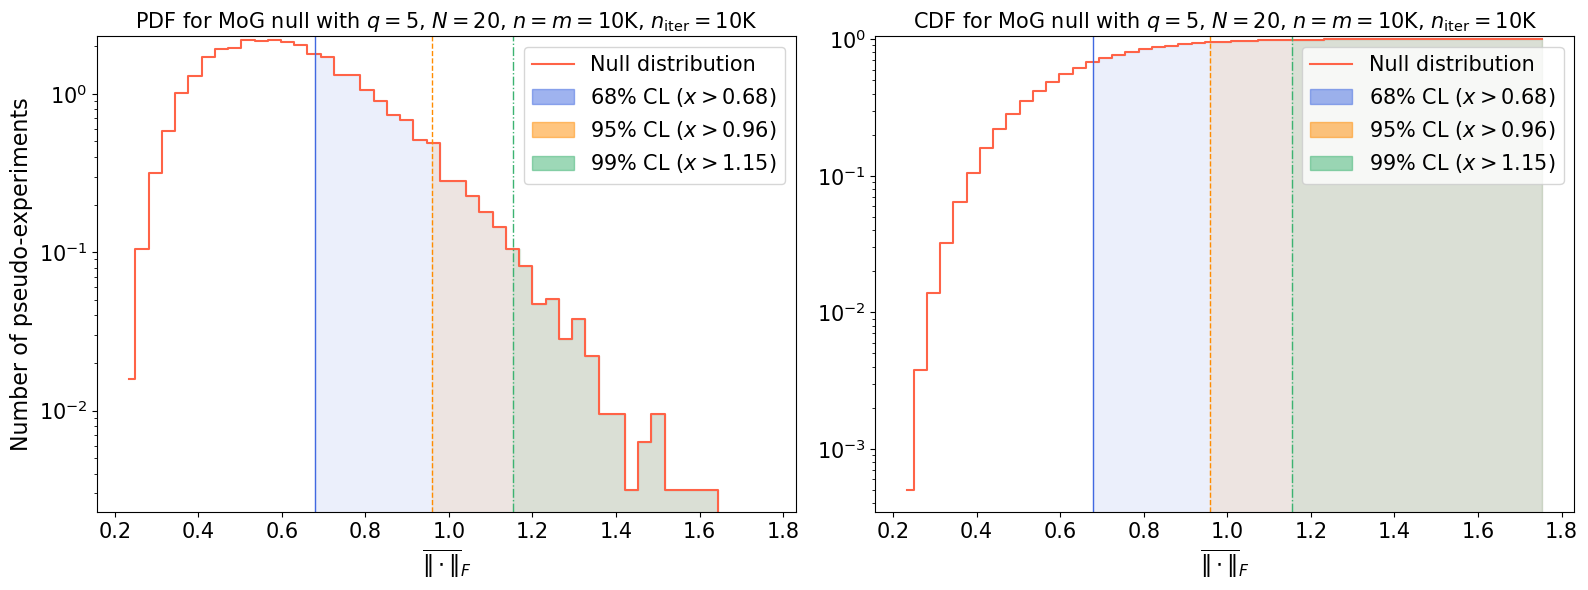

Time elapsed: 2.195528693497181 seconds.
mu = 0.0005752881947169553 +/- 1.5649503276510487e-09
sigma = 0.00039559453075732083 +/- 4.808078620866062e-06


/tmp/ipykernel_26695/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26695/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26695/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26695/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


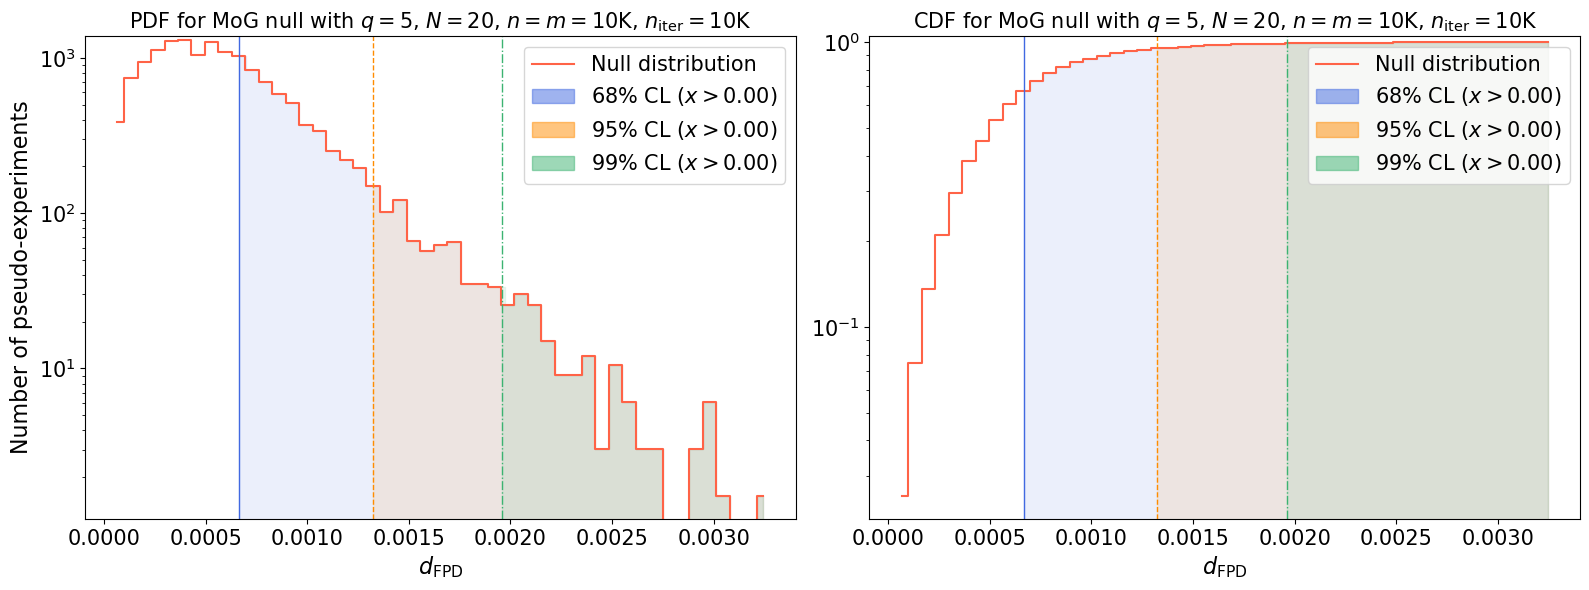

Time elapsed: 1.3283747546374798 seconds.
mu = 0.05916368584838151 +/- 0.00023866543417766097
sigma = 0.15448800412254052 +/- 0.0022844224876248215


/tmp/ipykernel_26695/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26695/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26695/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26695/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


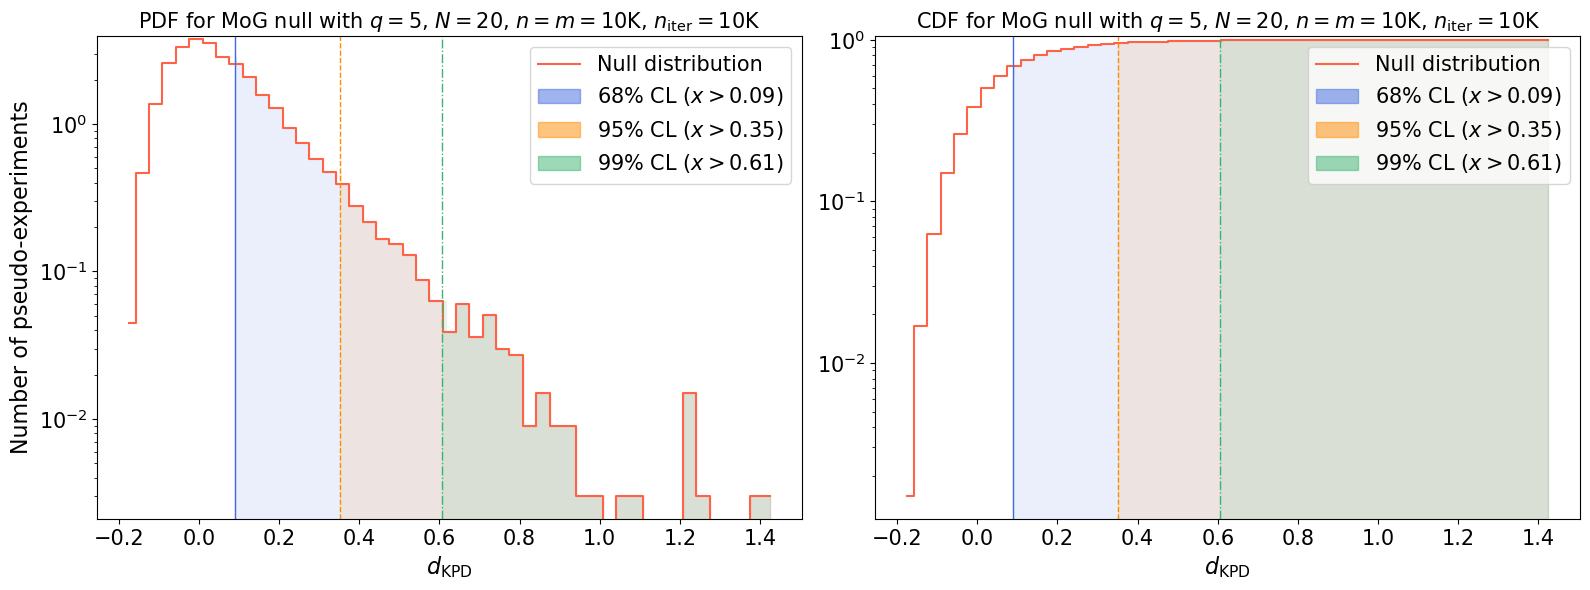

Time elapsed: 1.3664575964212418 seconds.
mu = 0.8661184235829871 +/- 0.0002688223305601763
sigma = 0.1639580222374545 +/- 0.0014492966451468332


/tmp/ipykernel_26695/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26695/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26695/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26695/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


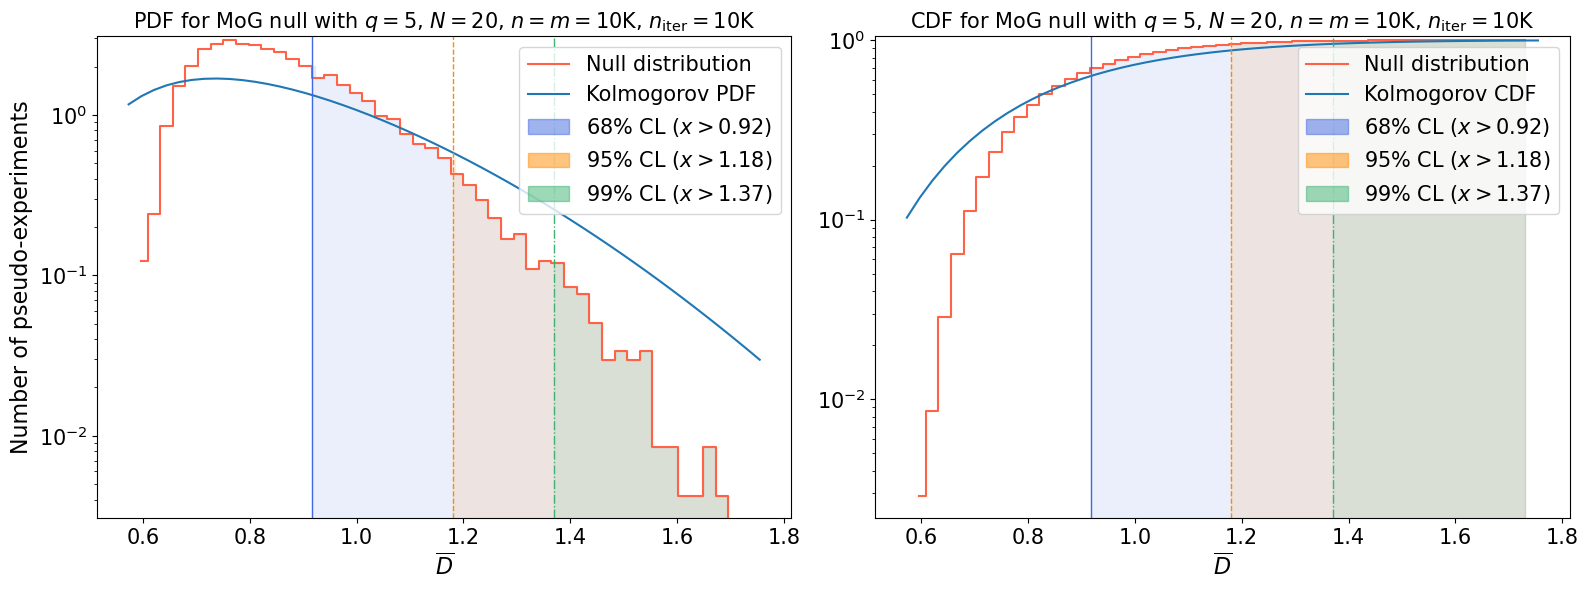

Time elapsed: 1.755663212388754 seconds.
mu = 0.8644640350571903 +/- 0.0002347751242327214
sigma = 0.15322373322456329 +/- 0.0014248537469858798


/tmp/ipykernel_26695/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26695/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26695/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26695/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


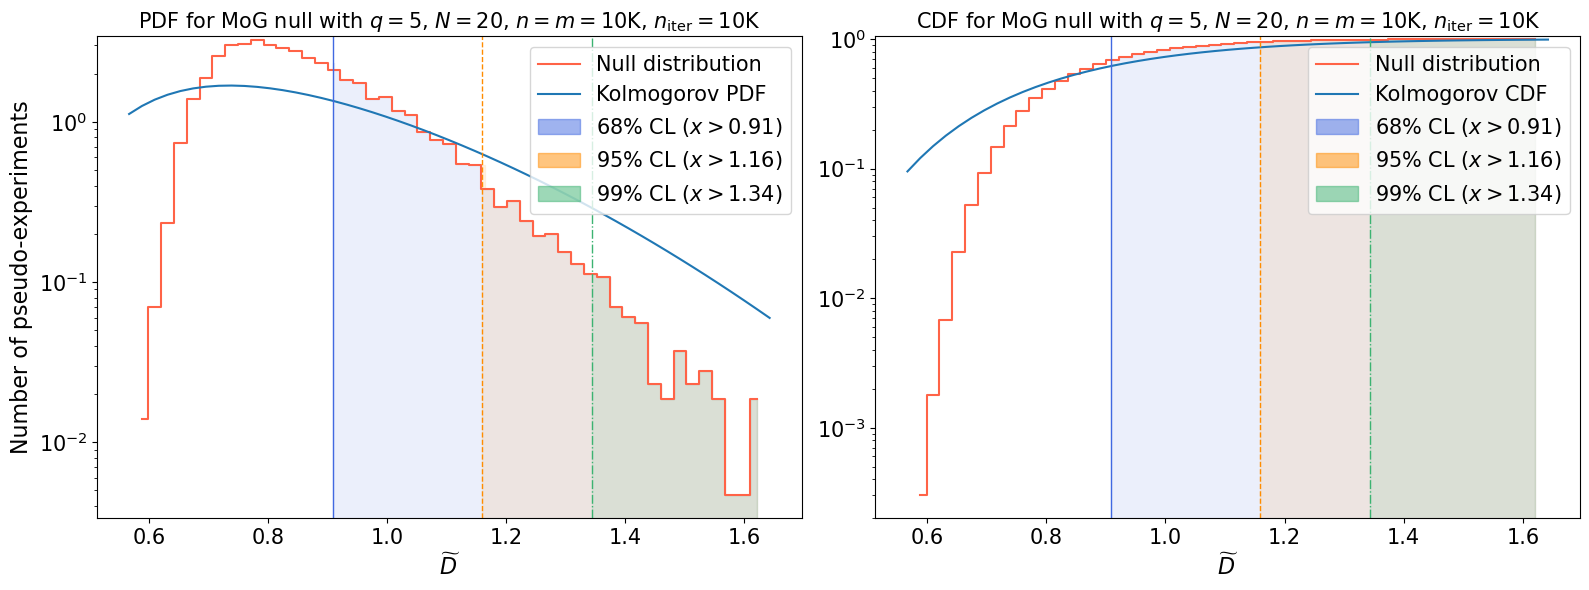

Time elapsed: 1.6060239039361477 seconds.
mu = 0.6303501041353103 +/- 0.0004144095234910916
sigma = 0.20357050952706573 +/- 0.001852256527705372


/tmp/ipykernel_26695/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_26695/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_26695/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_26695/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


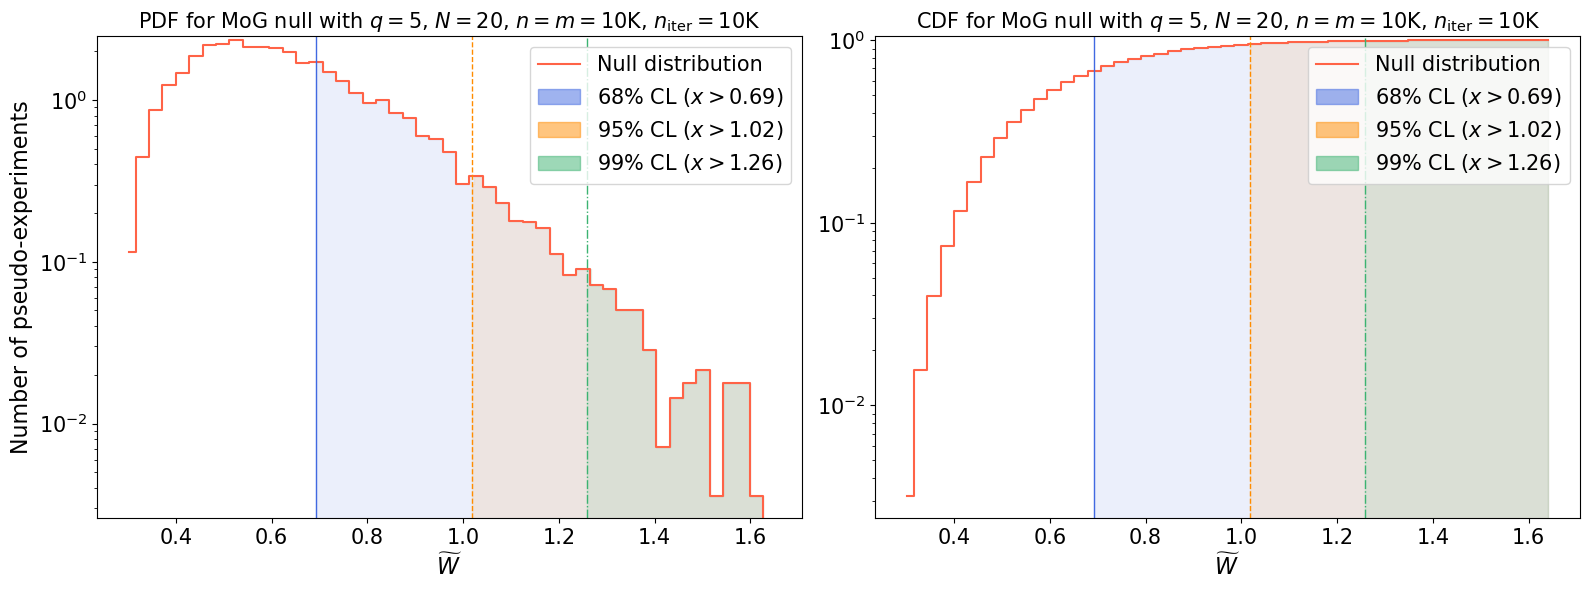

Time elapsed: 0.9301219135522842 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f682e100c10>   
1          metric_list  <function <lambda> at 0x7f682e100e50>   
2          metric_list  <function <lambda> at 0x7f6336b14940>   
3      statistic_means  <function <lambda> at 0x7f6336b149d0>   
4         metric_means  <function <lambda> at 0x7f6336b14a60>   
5         metric_means  <function <lambda> at 0x7f6336b14af0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f6336b14b80>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1  lambda ns, ndims: (ns/ndims)**(3/2)   
2  lambda ns, ndims: ns/np.sqrt(ndims)   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...              2   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...            200   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_10K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_10K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_10K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_10K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_10K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_10K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_10K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6792931553721728], [0....   
1  [[0.68, [6800, 3199], 0.0006669445748113884], ...   
2  [[0.68, [6800, 3199], 0.08986575104363914], [0...   
3  [[0.68, [6800, 3199], 0.9174711429984861], [0....   
4  [[0.68, [6800, 3199], 0.9090568803073205], [0....   
5  [[0.68, [6800, 3199], 0.6922491767525255], [0....   
6                                                 []   

                                  null_figure  
0   ../results/20D_10K/null_hypothesis/FN.pdf  
1  ../results/20D_10K/null_hypothesis/FPD.pdf  
2  ../results/20D_10K/null_hypothesis/KPD.pdf  
3   ../results/20D_10K/null_hypothesis/KS.pdf  
4  ../results/20D_10K/null_hypothesis/SKS.pdf  
5  ../results/20D_10K/null_hypothesis/SWD.pdf  
6                                         NaN

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [11]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [12]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [13]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [15]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with both deformation already loaded.
dict_keys(['2024-04-01T08:23:21.172703', '2024-04-01T08:47:54.657568', '2024-04-01T09:04:52.183143', '2024-04-01T09:28:20.993393', '2024-04-01T09:54:38.844618', '2024-04-01T10:15:44.319756', '2024-04-02T19:36:28.575621', '2024-04-03T06:40:04.519715', '2024-04-02T22:05:27.682017', '2024-04-02T22:30:02.087566', '2024-04-02T23:00:31.268014', '2024-04-02T23:29:25.868070', '2024-04-03T00:01:53.943456', '2024-04-03T00:28:52.796860', '2024-04-03T00:51:05.613321', '2024-04-03T01:18:05.846029', '2024-04-03T01:41:05.206003', '2024-04-03T01:59:31.655027', '2024-04-03T07:08:44.047805', '2024-04-03T08:36:53.640881', '2024-04-03T10:05:12.749003'])


### Show and save results

In [16]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [17]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [18]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean   20  10000                10000   
9         ks        mean   20  10000                10000   
0         fn        mean   20  10000                10000   
12       sks        mean   20  10000                10000   
3        fpd        mean   20  10000                10000   
15       swd        mean   20  10000                10000   
6        kpd        mean   20  10000                10000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00058                             0.00080   
9                              0.01041                             0.01494   
0                              0.06421                             0.09300   
12                             0.07349                             0.10289   
3                              0.09546                             0.14007   
15                             0.12061                             0.17471   
6                              0.16943                             0.23675   

    $t^{\mu}$ (s)  
18           5289  
9            1829  
0            1473  
12           1618  
3            1577  
15           1379  
6            1507

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00058   
9         ks                             0.01041   
0         fn                             0.06421   
12       sks                             0.07349   
3        fpd                             0.09546   
15       swd                             0.12061   
6        kpd                             0.16943   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00080           5289  
9                              0.01494           1829  
0                              0.09300           1473  
12                             0.10289           1618  
3                              0.14007           1577  
15                             0.17471           1379  
6                              0.23675           1507

In [19]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std   20  10000                10000   
10        ks         std   20  10000                10000   
13       sks         std   20  10000                10000   
4        fpd         std   20  10000                10000   
16       swd         std   20  10000                10000   
1         fn         std   20  10000                10000   
7        kpd         std   20  10000                10000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00079   
10                                0.02698   
13                                0.21973   
4                                 0.29590   
16                                0.39258   
1                                 0.54102   
7                                 2.41211   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00110              5299  
10                                0.03945              1734  
13                                0.33402              1332  
4                                 0.42379              1265  
16                                0.58002              1106  
1                                 0.68983              1017  
7                                 2.87894              1562

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00079   
10        ks                                0.02698   
13       sks                                0.21973   
4        fpd                                0.29590   
16       swd                                0.39258   
1         fn                                0.54102   
7        kpd                                2.41211   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00110              5299  
10                                0.03945              1734  
13                                0.33402              1332  
4                                 0.42379              1265  
16                                0.58002              1106  
1                                 0.68983              1017  
7                                 2.87894              1562

In [20]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both   20  10000                10000   
11        ks        both   20  10000                10000   
2         fn        both   20  10000                10000   
14       sks        both   20  10000                10000   
5        fpd        both   20  10000                10000   
17       swd        both   20  10000                10000   
8        kpd        both   20  10000                10000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00049   
11                                    0.00974   
2                                     0.06372   
14                                    0.06714   
5                                     0.09106   
17                                    0.11182   
8                                     0.16943   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00065                  5657  
11                                    0.01403                  1948  
2                                     0.09161                  1408  
14                                    0.09492                  1620  
5                                     0.13323                  1481  
17                                    0.16256                  1449  
8                                     0.23675                  1474

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00049   
11        ks                                    0.00974   
2         fn                                    0.06372   
14       sks                                    0.06714   
5        fpd                                    0.09106   
17       swd                                    0.11182   
8        kpd                                    0.16943   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00065                  5657  
11                                    0.01403                  1948  
2                                     0.09161                  1408  
14                                    0.09492                  1620  
5                                     0.13323                  1481  
17                                    0.16256                  1449  
8                                     0.23675                  1474

In [22]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0          $t_{\mathrm{LLR}}$                             0.00058   
1              $\overline{D}$                             0.01041   
2  $\overline{\|\cdot\|}_{F}$                             0.06421   
3             $\widetilde{D}$                             0.07349   
4          $d_{\mathrm{FPD}}$                             0.09546   
5             $\widetilde{W}$                             0.12061   
6          $d_{\mathrm{KPD}}$                             0.16943   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00080           5289   
1                             0.01494           1829   
2                             0.09300           1473   
3                             0.10289           1618   
4                             0.14007           1577   
5                             0.17471           1379   
6                             0.23675           1507   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00079   
1                                0.02698   
2                                0.54102   
3                                0.21973   
4                                0.29590   
5                                0.39258   
6                                2.41211   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00110              5299   
1                                0.03945              1734   
2                                0.68983              1017   
3                                0.33402              1332   
4                                0.42379              1265   
5                                0.58002              1106   
6                                2.87894              1562   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00049   
1                                    0.00974   
2                                    0.06372   
3                                    0.06714   
4                                    0.09106   
5                                    0.11182   
6                                    0.16943   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00065                  5657   
1                                    0.01403                  1948   
2                                    0.09161                  1408   
3                                    0.09492                  1620   
4                                    0.13323                  1481   
5                                    0.16256                  1449   
6                                    0.23675                  1474   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                     454  
2                     101  
3                     945  
4                    2024  
5                     514  
6                    9145

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.00058 & 0.0008 & 5289 & 0.00079 & 0.0011 & 5299 & 0.00049 & 0.00065 & 5657 & - \\
$\overline{D}$ & 0.01 & 0.015 & 1829 & 0.027 & 0.039 & 1734 & 0.0097 & 0.014 & 1948 & 454 \\
$\overline{\|\cdot\|}_{F}$ & 0.064 & 0.093 & 1473 & 0.54 & 0.69 & 1017 & 0.064 & 0.092 & 1408 & 101 \\
$\widetilde{D}$ & 0.073 & 0.1 & 1618 & 0.22 & 0.33 & 1332 & 0.067 & 0.095 & 1620 & 945 \\
$d_{\mathrm{FPD}}$ & 0.095 & 0.14 & 1577 & 0.3 & 0.42 & 1265 & 0.091 & 0.13 & 1481 & 2024 \\
$\widetilde{W}$ & 0.12 & 0.17 & 1379 & 0.39 & 0.58 & 1106 & 0.11 & 0.16 & 1449 & 514 \\
$d_{\mathrm{KPD}}$ & 0.17 & 0.24 & 150

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 20_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            20000            1000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True       20           0  float64    20  200000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 1000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 100,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/20D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'me

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[1:2]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and saving fpd with max_vectorize = 100

------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 20000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .


Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .
Iterating from 1600 to 1700 out of 10000 .
Iterating from 1700 to 1800 out of 10000 .
Iterating from 1800 to 1900 out of 10000 .
Iterating from 1900 to 2000 out of 10000 .
Iterating from 2000 to 2100 out of 10000 .
Iterating from 2100 to 2200 out of 10000 .
Iterating from 2200 to 2300 out of 10000 .
Iterating from 2300 to 2400 out of 10000 .
Iterating from 2400 to 2500 

In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[1:2]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.0003402214581118472], [0.95, [9500, 500], 0.0006656309032713404], [0.99, [9900, 100], 0.0009396392818208311]]
Computing time for metric fpd: 875.5575828149999


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f3c4ffff910>   
1          metric_list  <function <lambda> at 0x7f3c4ffff130>   
2          metric_list  <function <lambda> at 0x7f3c500949d0>   
3      statistic_means  <function <lambda> at 0x7f3c50094a60>   
4         metric_means  <function <lambda> at 0x7f3c50094af0>   
5         metric_means  <function <lambda> at 0x7f3c50094b80>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f3c50094c10>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1  lambda ns, ndims: (ns/ndims)**(3/2)   
2  lambda ns, ndims: ns/np.sqrt(ndims)   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...            100   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            100   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              2   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...             50   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...             50   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...             50   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...             50   

                        latex                                    null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_20K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_20K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_20K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_20K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_20K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_20K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_20K/null_hypothesis/LR.json   

                                          thresholds  
0                                                NaN  
1  [[0.68, [6800, 3199], 0.0003402214581118472], ...  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                 []

### Plots of null-distributions

mu = 0.6112308741840622 +/- 0.0003564984324566089
sigma = 0.18881166077777317 +/- 0.001575167235675641


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


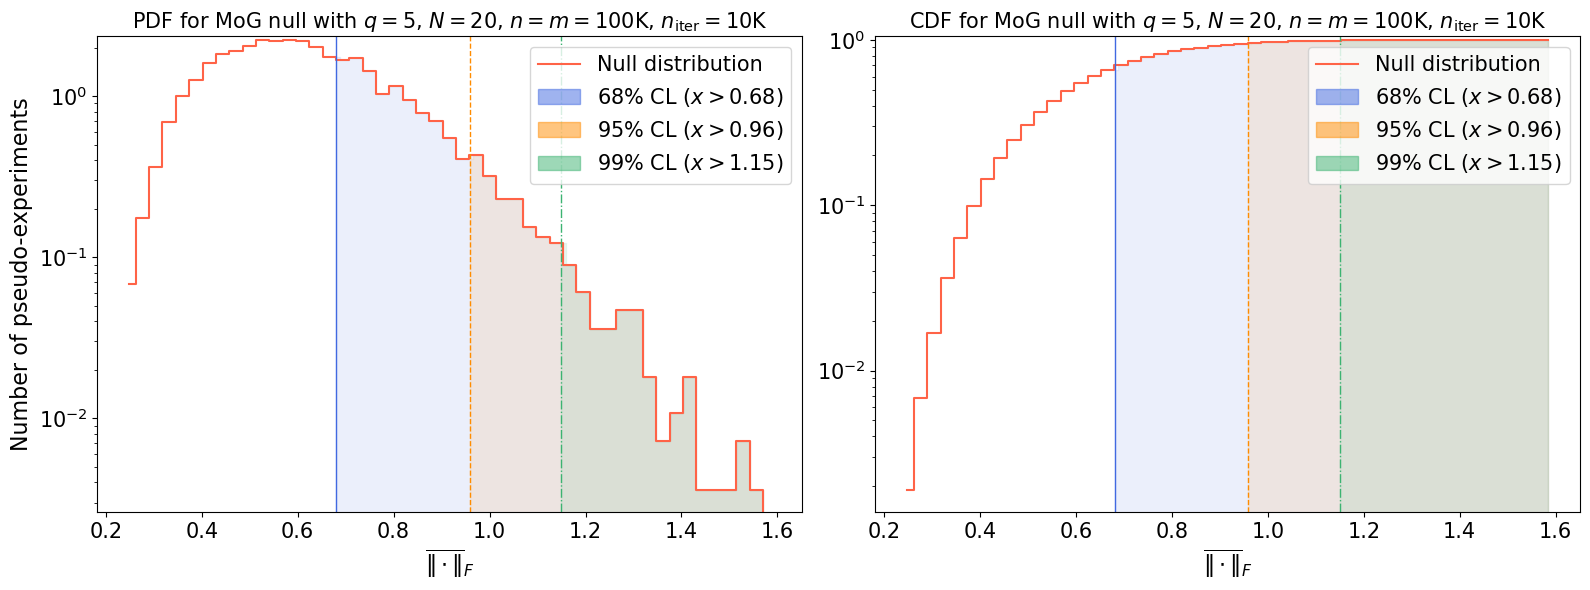

Time elapsed: 1.7979147396981716 seconds.
mu = 0.00015283630640011475 +/- 8.484825444275987e-12
sigma = 2.9128723700629226e-05 +/- 5.729637627745863e-07


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


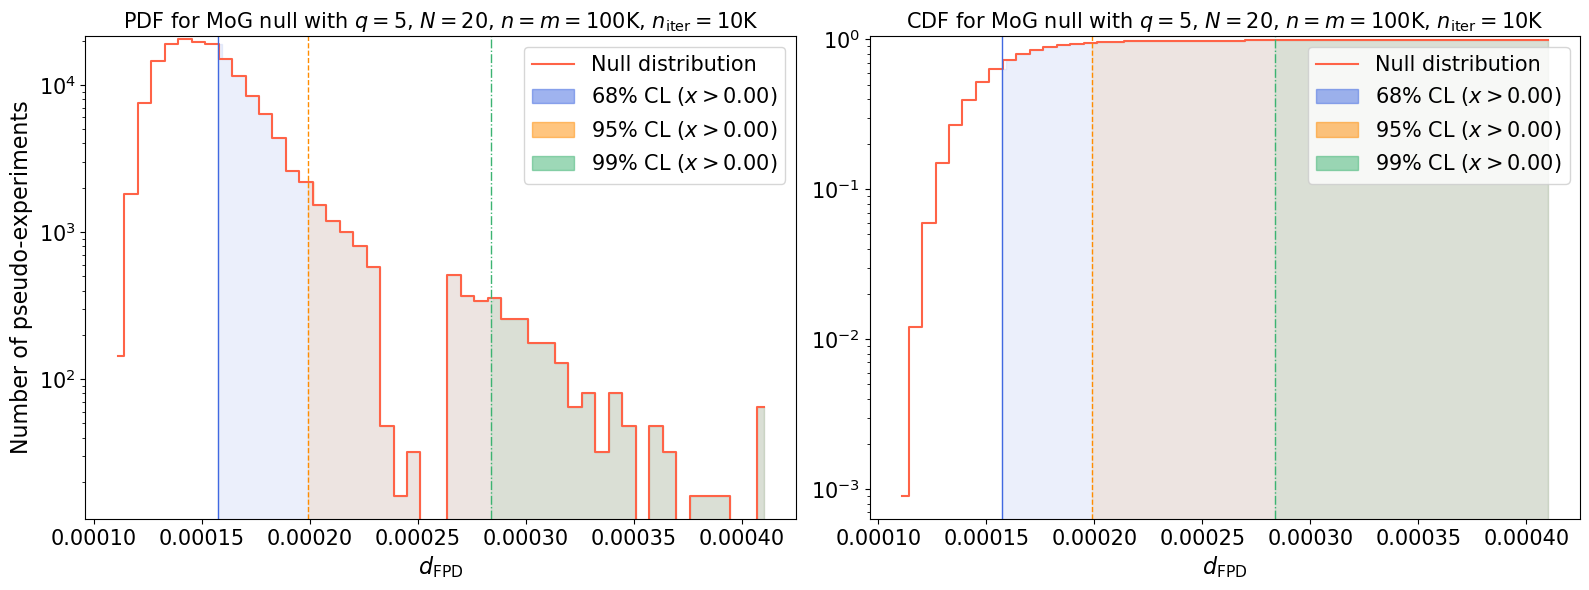

Time elapsed: 1.0383188799023628 seconds.
mu = -0.4494978149726764 +/- 0.004557730479641301
sigma = 0.6751096562515827 +/- 0.006288121100853414


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


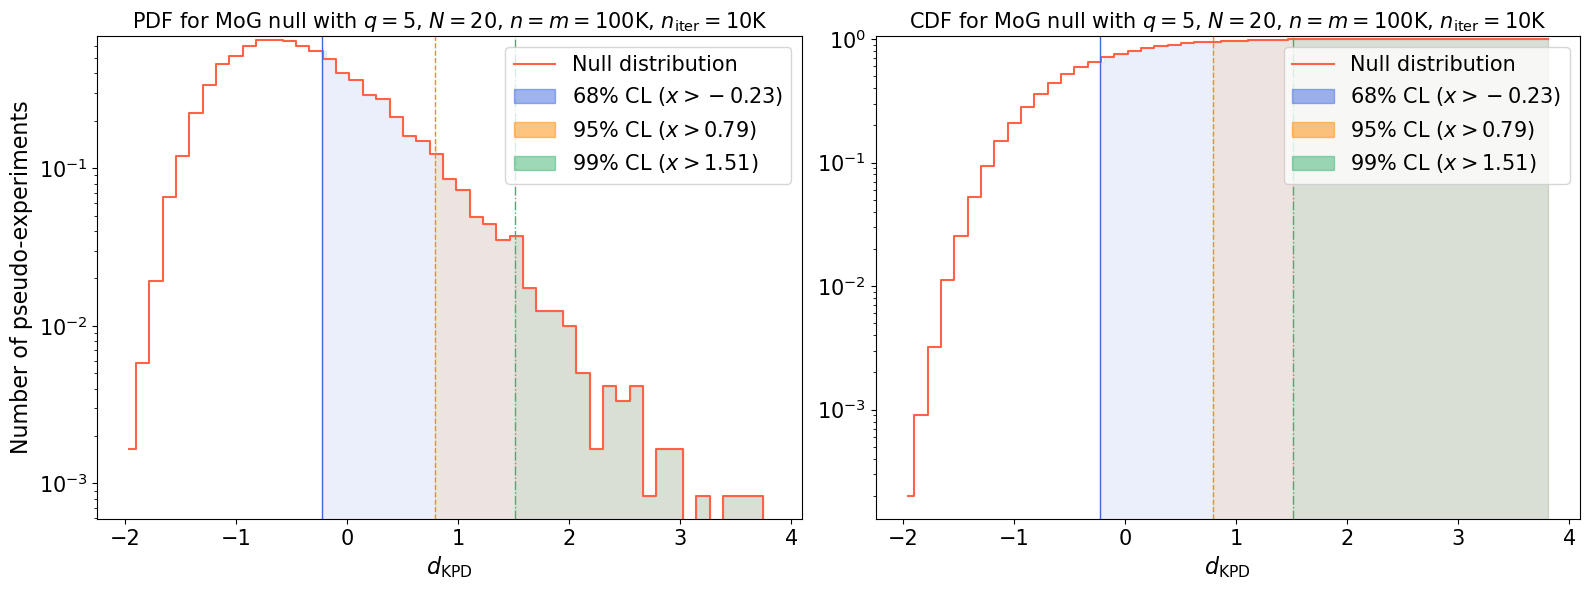

Time elapsed: 0.9453720971941948 seconds.
mu = 0.8687314218236579 +/- 0.00026410640602248984
sigma = 0.16251350898386566 +/- 0.0014739232965723654


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


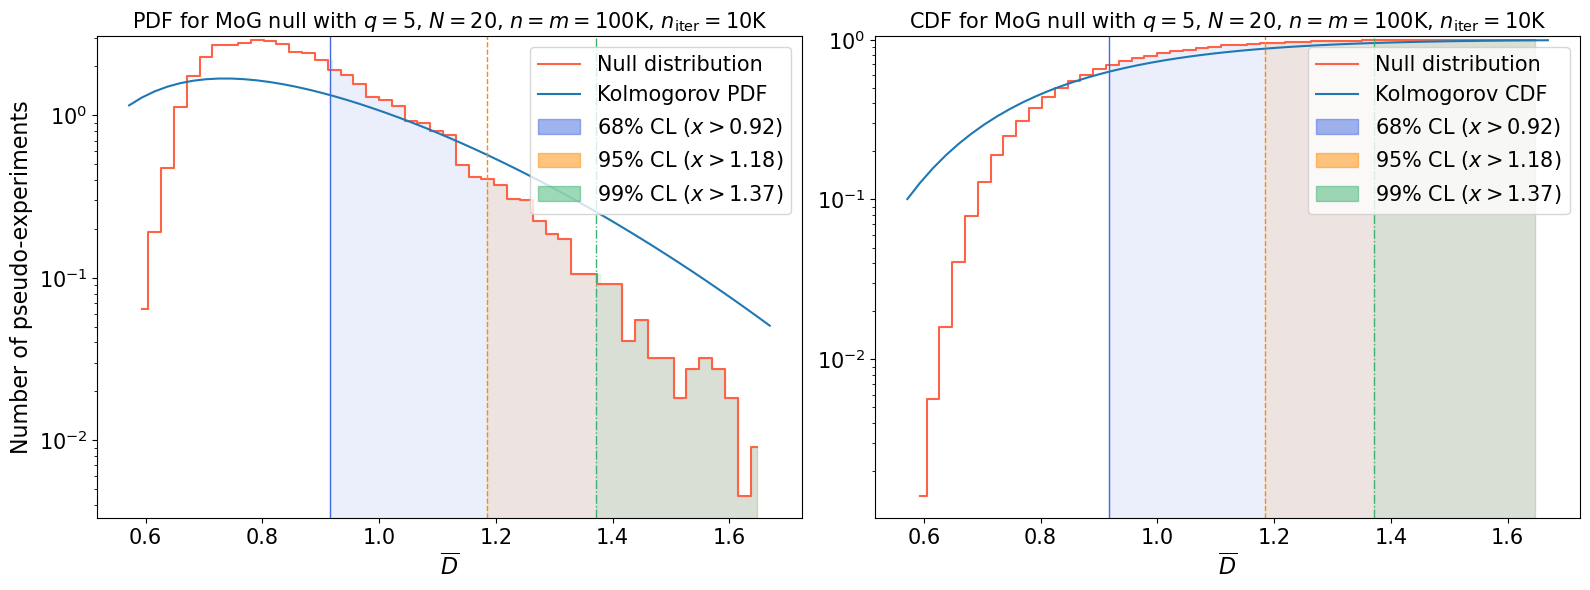

Time elapsed: 1.2212602198123932 seconds.
mu = 0.8702649456377327 +/- 0.00024136020197641154
sigma = 0.1553577168911836 +/- 0.001466338936518558


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


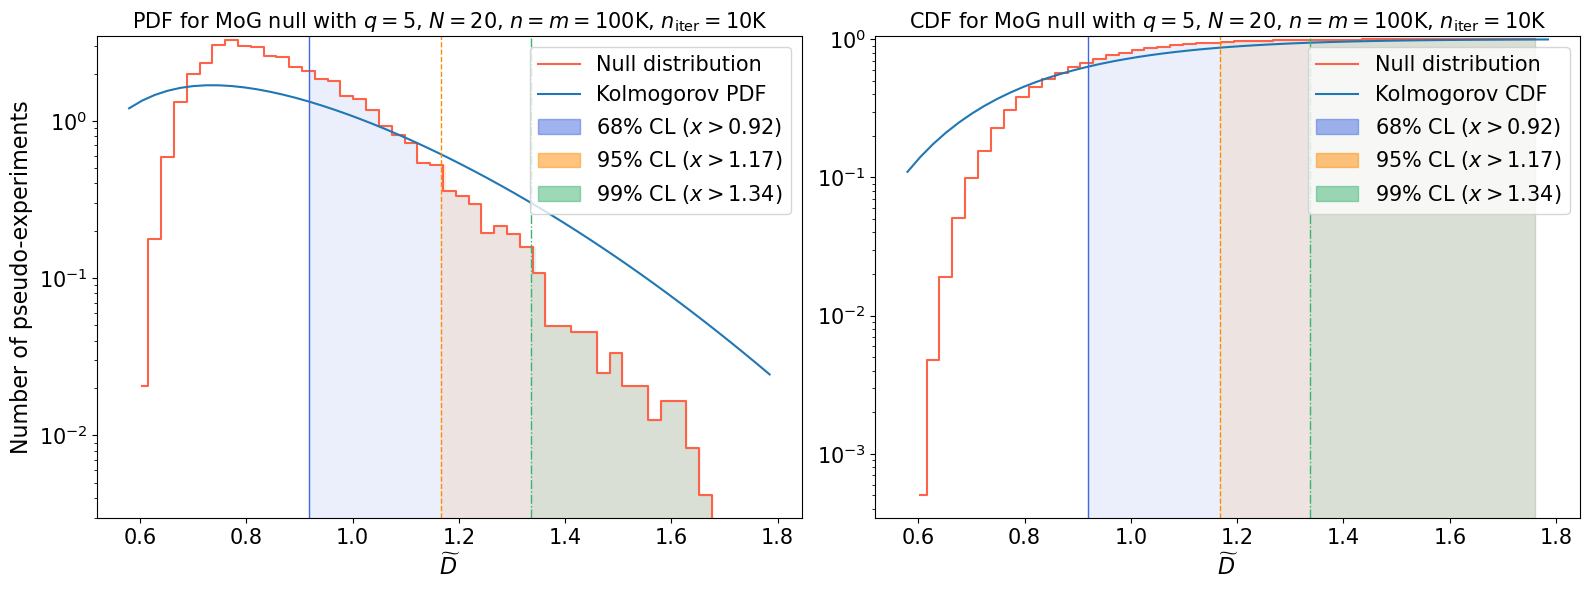

Time elapsed: 1.2739188112318516 seconds.
mu = 0.6348193151429157 +/- 0.000424070851077063
sigma = 0.2059298062634603 +/- 0.0018859599830024915


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


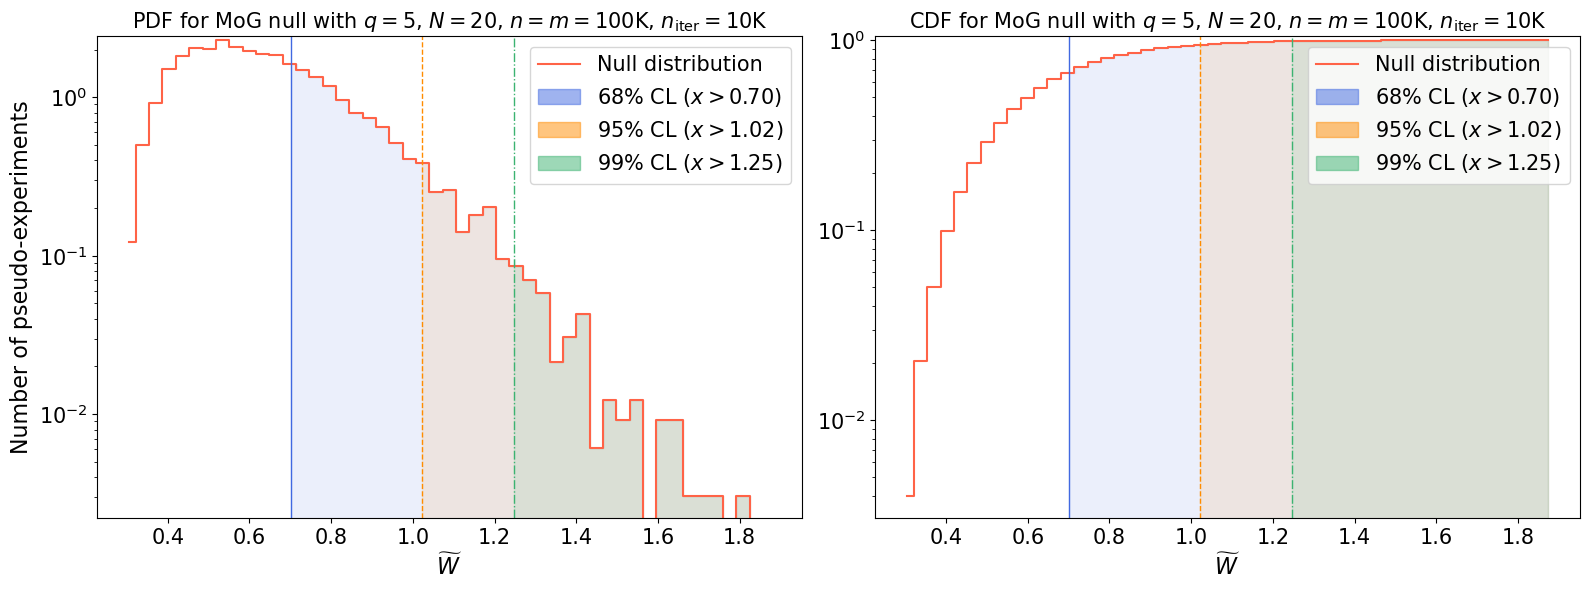

Time elapsed: 0.9008969515562057 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f3e4356b0a0>   
1          metric_list  <function <lambda> at 0x7f3e4356bf40>   
2          metric_list  <function <lambda> at 0x7f3e43401000>   
3      statistic_means  <function <lambda> at 0x7f3e43401090>   
4         metric_means  <function <lambda> at 0x7f3e43401120>   
5         metric_means  <function <lambda> at 0x7f3e434011b0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f3e43401240>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1  lambda ns, ndims: (ns/ndims)**(3/2)   
2  lambda ns, ndims: ns/np.sqrt(ndims)   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              2   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   

                        latex                                     null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_100K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_100K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_100K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_100K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_100K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_100K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_100K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6807187961337008], [0....   
1  [[0.68, [6800, 3199], 0.00015735387007512796],...   
2  [[0.68, [6800, 3199], -0.22887009460864668], [...   
3  [[0.68, [6800, 3199], 0.9164528634038741], [0....   
4  [[0.68, [6800, 3199], 0.9183098708262618], [0....   
5  [[0.68, [6800, 3199], 0.7012302162933935], [0....   
6                                                 []   

                                   null_figure  
0   ../results/20D_100K/null_hypothesis/FN.pdf  
1  ../results/20D_100K/null_hypothesis/FPD.pdf  
2  ../results/20D_100K/null_hypothesis/KPD.pdf  
3   ../results/20D_100K/null_hypothesis/KS.pdf  
4  ../results/20D_100K/null_hypothesis/SKS.pdf  
5  ../results/20D_100K/null_hypothesis/SWD.pdf  
6                                          NaN

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())


=============== fpd - only mean ===============

------------ 1 ------------
eps = 0.5


statistic = 1679.9386900132613 - next threshold = 37.92305847912669 at 0.95 CL

------------ 2 ------------
eps = 0.25
statistic = 438.52320124336353 - next threshold = 37.92305847912669 at 0.95 CL

------------ 3 ------------
eps = 0.125
statistic = 131.55411798692137 - next threshold = 37.92305847912669 at 0.95 CL

------------ 4 ------------
eps = 0.0625
statistic = 53.36715343034054 - next threshold = 37.92305847912669 at 0.95 CL

------------ 5 ------------
eps = 0.03125
statistic = 39.35049017911236 - next threshold = 37.92305847912669 at 0.95 CL

------------ 6 ------------
eps = 0.015625
statistic = 30.827703243023603 - next threshold = 37.92305847912669 at 0.95 CL

------------ 7 ------------
eps = 0.0234375
statistic = 34.04333597994621 - next threshold = 37.92305847912669 at 0.95 CL

------------ 8 ------------
eps = 0.02734375
statistic = 36.59950371305864 - next threshold = 37.92305847912669 at 0.95 CL

------------ 9 ------------
eps = 0.029296875
statistic = 37.294351989

### Likelihood-ratio test

In [21]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [22]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())


=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 200
Iterating from 0 to 50 out of 10000 .
Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10000 .
Iterating from 400 to 450 out of 10000 .
Iterating from 450 to 500 out of 10000 .
Iterating from 500 to 550 out of 10000 .
Iterating from 550 to 600 out of 10000 .
Iterating from 600 to 650 out of 10000 .
Iterating from 650 to 700 out of 10000 .
Iterating from 700 to 750 out of 10000 .
Iterating from 750 to 800 out of 10

### Show and save results

In [24]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


NameError: name 'null_times' is not defined

In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean    5  10000                10000   
9         ks        mean    5  10000                10000   
12       sks        mean    5  10000                10000   
15       swd        mean    5  10000                10000   
3        fpd        mean    5  10000                10000   
0         fn        mean    5  10000                10000   
6        kpd        mean    5  10000                10000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00115                             0.00157   
9                              0.01010                             0.01342   
12                             0.02338                             0.03399   
15                             0.04333                             0.06272   
3                              0.06177                             0.08811   
0                              0.06372                             0.08635   
6                              0.07837                             0.10852   

    $t^{\mu}$ (s)  
18           1533  
9             227  
12            312  
15            231  
3             374  
0             225  
6             428

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00115   
9         ks                             0.01010   
12       sks                             0.02338   
15       swd                             0.04333   
3        fpd                             0.06177   
0         fn                             0.06372   
6        kpd                             0.07837   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00157           1533  
9                              0.01342            227  
12                             0.03399            312  
15                             0.06272            231  
3                              0.08811            374  
0                              0.08635            225  
6                              0.10852            428

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std    5  10000                10000   
10        ks         std    5  10000                10000   
13       sks         std    5  10000                10000   
16       swd         std    5  10000                10000   
4        fpd         std    5  10000                10000   
1         fn         std    5  10000                10000   
7        kpd         std    5  10000                10000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00140   
10                                0.02551   
13                                0.05542   
16                                0.09399   
4                                 0.13818   
1                                 0.17139   
7                                 0.99609   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00212              1453  
10                                0.03253               201  
13                                0.08056               281  
16                                0.13514               205  
4                                 0.19794               308  
1                                 0.25150               194  
7                                 0.99805               154

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00140   
10        ks                                0.02551   
13       sks                                0.05542   
16       swd                                0.09399   
4        fpd                                0.13818   
1         fn                                0.17139   
7        kpd                                0.99609   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00212              1453  
10                                0.03253               201  
13                                0.08056               281  
16                                0.13514               205  
4                                 0.19794               308  
1                                 0.25150               194  
7                                 0.99805               154

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both    5  10000                10000   
11        ks        both    5  10000                10000   
14       sks        both    5  10000                10000   
17       swd        both    5  10000                10000   
5        fpd        both    5  10000                10000   
2         fn        both    5  10000                10000   
8        kpd        both    5  10000                10000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00091   
11                                    0.00870   
14                                    0.02057   
17                                    0.03845   
5                                     0.05737   
2                                     0.05884   
8                                     0.07837   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00126                  1600  
11                                    0.01151                   237  
14                                    0.02954                   324  
17                                    0.05559                   210  
5                                     0.08200                   382  
2                                     0.07975                   202  
8                                     0.10852                   441

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00091   
11        ks                                    0.00870   
14       sks                                    0.02057   
17       swd                                    0.03845   
5        fpd                                    0.05737   
2         fn                                    0.05884   
8        kpd                                    0.07837   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00126                  1600  
11                                    0.01151                   237  
14                                    0.02954                   324  
17                                    0.05559                   210  
5                                     0.08200                   382  
2                                     0.07975                   202  
8                                     0.10852                   441

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $t_{\mathrm{LLR}}$                             0.00115   
1      $\overline{D}$                             0.01010   
2     $\widetilde{D}$                             0.02338   
3     $\widetilde{W}$                             0.04333   
4                 fpd                             0.06177   
5                  fn                             0.06372   
6                 kpd                             0.07837   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00157           1533   
1                             0.01342            227   
2                             0.03399            312   
3                             0.06272            231   
4                             0.08811            374   
5                             0.08635            225   
6                             0.10852            428   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00140   
1                                0.02551   
2                                0.05542   
3                                0.09399   
4                                0.13818   
5                                0.17139   
6                                0.99609   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00212              1453   
1                                0.03253               201   
2                                0.08056               281   
3                                0.13514               205   
4                                0.19794               308   
5                                0.25150               194   
6                                0.99805               154   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00091   
1                                    0.00870   
2                                    0.02057   
3                                    0.03845   
4                                    0.05737   
5                                    0.05884   
6                                    0.07837   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00126                  1600   
1                                    0.01151                   237   
2                                    0.02954                   324   
3                                    0.05559                   210   
4                                    0.08200                   382   
5                                    0.07975                   202   
6                                    0.10852                   441   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                     335  
2                    1323  
3                     718  
4                    1305  
5                     250  
6                   17811

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0011 & 0.0016 & 1533 & 0.0014 & 0.0021 & 1453 & 0.00091 & 0.0013 & 1600 & - \\
$\overline{D}$ & 0.01 & 0.013 & 227 & 0.026 & 0.033 & 201 & 0.0087 & 0.012 & 237 & 335 \\
$\widetilde{D}$ & 0.023 & 0.034 & 312 & 0.055 & 0.081 & 281 & 0.021 & 0.03 & 324 & 1323 \\
$\widetilde{W}$ & 0.043 & 0.063 & 231 & 0.094 & 0.14 & 205 & 0.038 & 0.056 & 210 & 718 \\
fpd & 0.062 & 0.088 & 374 & 0.14 & 0.2 & 308 & 0.057 & 0.082 & 382 & 1305 \\
fn & 0.064 & 0.086 & 225 & 0.17 & 0.25 & 194 & 0.059 & 0.08 & 202 & 250 \\
kpd & 0.078 & 0.11 & 428 & 1 & 1 & 154 & 0.078 & 0.11 & 441 & 17811 \\
\bottomrule
\e

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000           100000            1000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...       20           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims    nsamples  small_sample  \
0       True       20           0  float64    20  1000000000         False   

   ncomp  
0      5  

[1 rows x 21 columns]

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 1000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 20,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 20,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 20,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 5},
  'max_vectorize': 100,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/20D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/20D_100K/null_hypothesis/FN.json
Computing and saving fpd with max_vectorize = 20

------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.


nchunks = 500
Iterating from 0 to 20 out of 10000 .
Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating fr

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6807187961337008], [0.95, [9500, 500], 0.9594347471604437], [0.99, [9900, 100], 1.1498425847253453]]
Computing time for metric fn: 655.0717135090381
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.00015735387007512796], [0.95, [9500, 500], 0.0001991294338873111], [0.99, [9900, 100], 0.00028358152805583374]]
Computing time for metric fpd: 5397.108640324324
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.22887009460864668], [0.95, [9500, 500], 0.7914437115660264], [0.99, [9900, 100], 1.5091861439005665]]
Computing time for metric kpd: 9617.810344848782
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9164528634038741], [0.95, [9500, 500], 1.184559320023883], [0.99, [9900, 100], 1.3714935690096466]]
Computing time for metric ks: 2775.669123016298
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9183098708262618], [0.95, [9500, 500], 1.1669605448982385], [0.99, [9900, 100], 1.3361855837522914]]
Computing time for metric sks: 2262.

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f3e4356b0a0>   
1          metric_list  <function <lambda> at 0x7f3e4356bf40>   
2          metric_list  <function <lambda> at 0x7f3e43401000>   
3      statistic_means  <function <lambda> at 0x7f3e43401090>   
4         metric_means  <function <lambda> at 0x7f3e43401120>   
5         metric_means  <function <lambda> at 0x7f3e434011b0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f3e43401240>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1  lambda ns, ndims: (ns/ndims)**(3/2)   
2  lambda ns, ndims: ns/np.sqrt(ndims)   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              2   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   

                        latex                                     null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_100K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_100K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_100K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_100K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_100K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_100K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_100K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6807187961337008], [0....  
1  [[0.68, [6800, 3199], 0.00015735387007512796],...  
2  [[0.68, [6800, 3199], -0.22887009460864668], [...  
3  [[0.68, [6800, 3199], 0.9164528634038741], [0....  
4  [[0.68, [6800, 3199], 0.9183098708262618], [0....  
5  [[0.68, [6800, 3199], 0.7012302162933935], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6112308741840622 +/- 0.0003564984324566089
sigma = 0.18881166077777317 +/- 0.001575167235675641


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


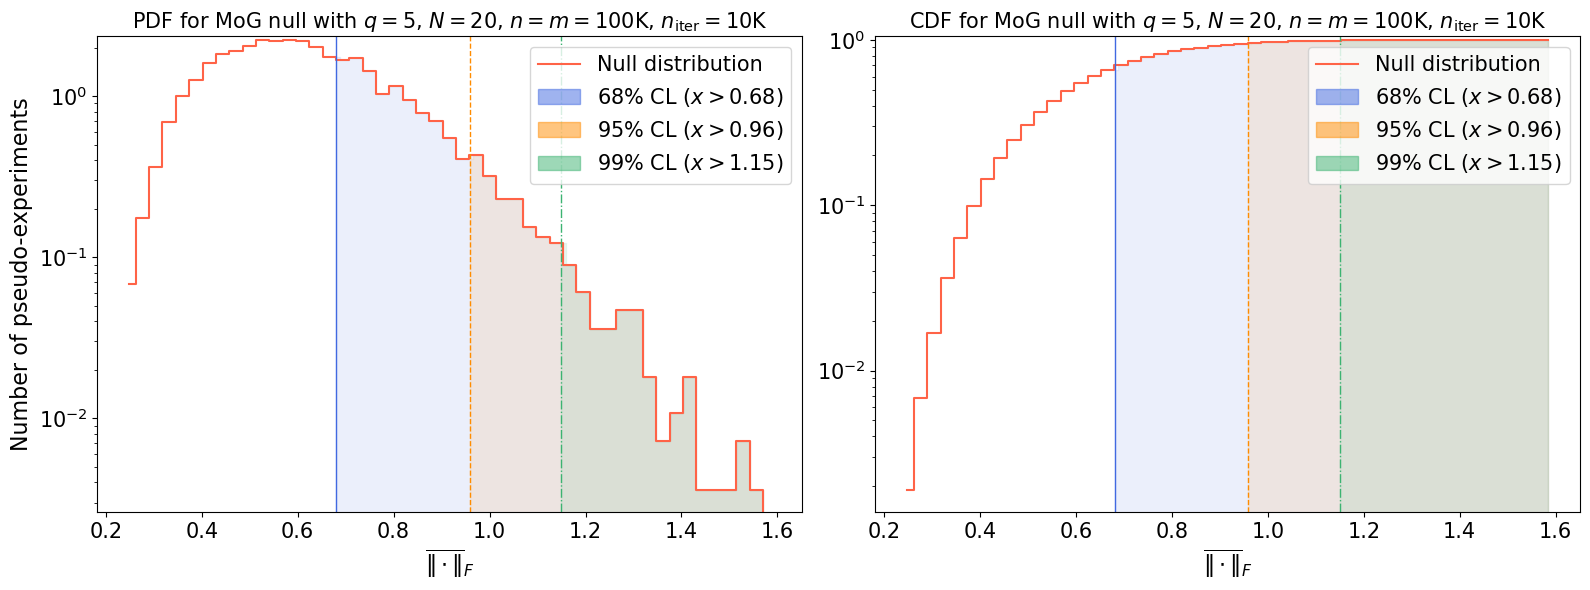

Time elapsed: 1.7979147396981716 seconds.
mu = 0.00015283630640011475 +/- 8.484825444275987e-12
sigma = 2.9128723700629226e-05 +/- 5.729637627745863e-07


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


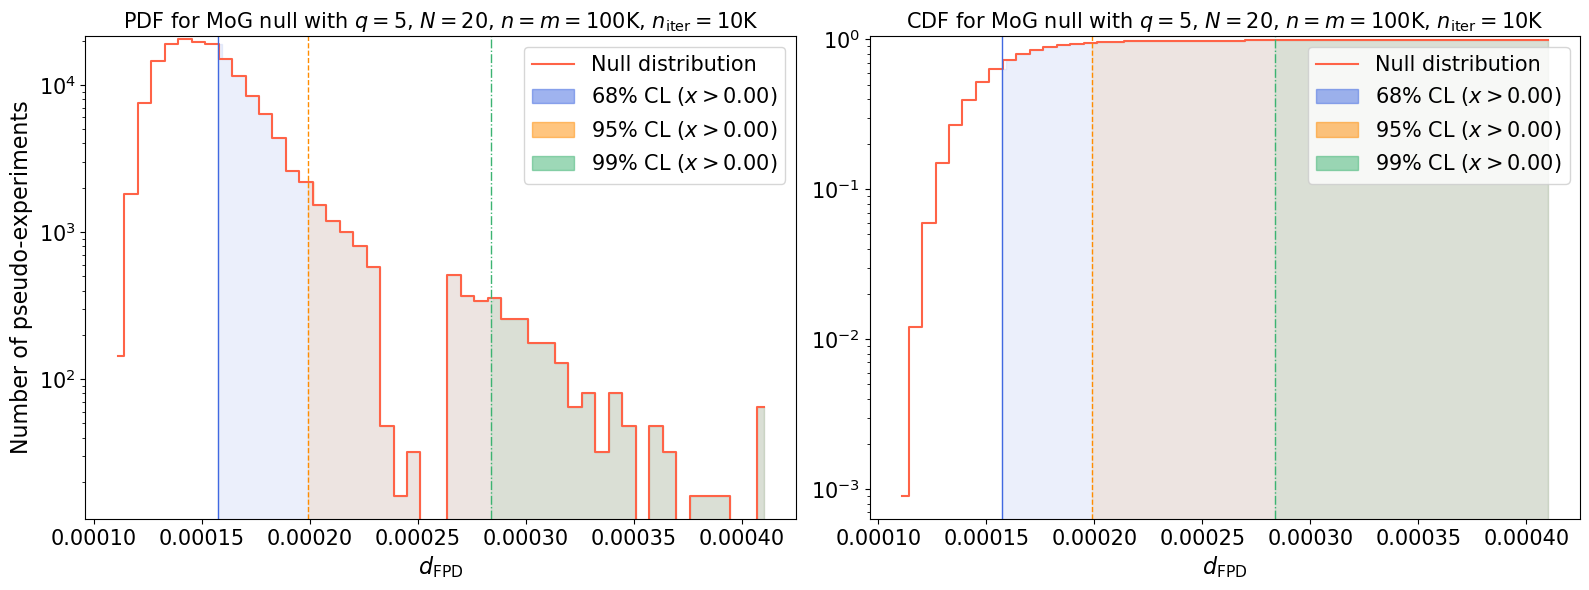

Time elapsed: 1.0383188799023628 seconds.
mu = -0.4494978149726764 +/- 0.004557730479641301
sigma = 0.6751096562515827 +/- 0.006288121100853414


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


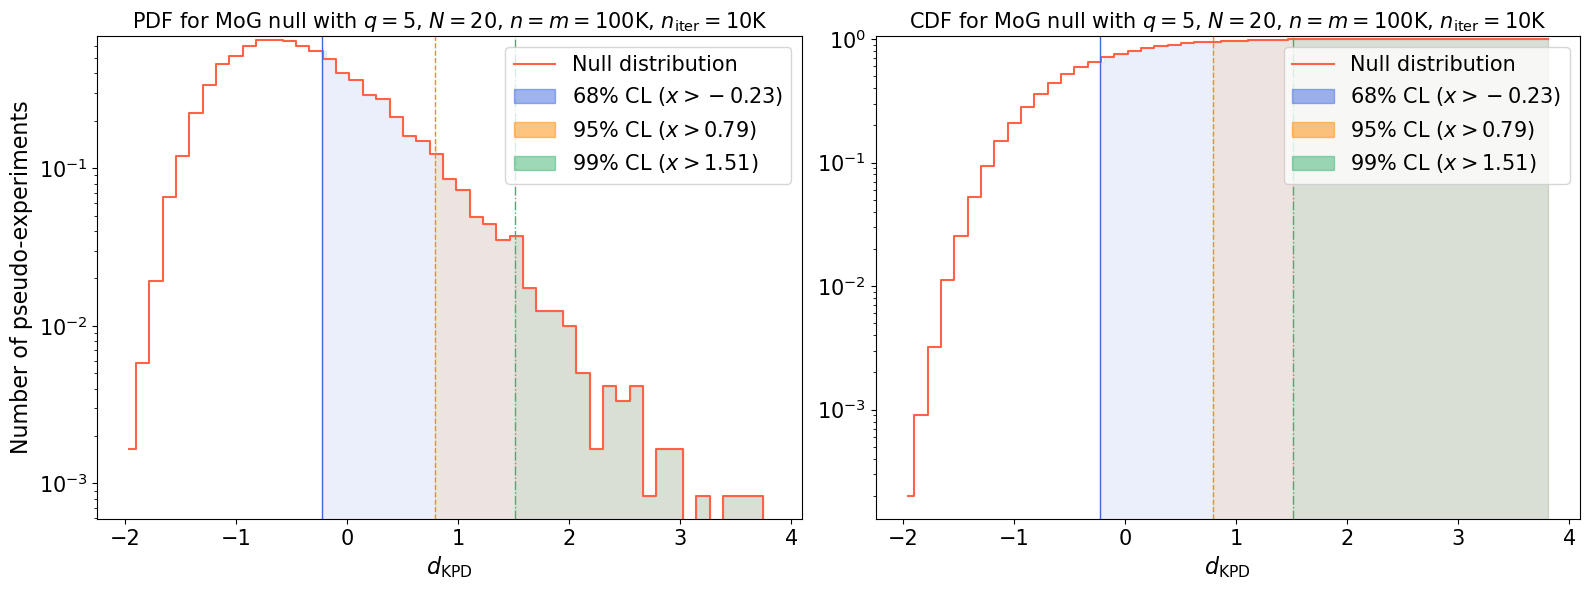

Time elapsed: 0.9453720971941948 seconds.
mu = 0.8687314218236579 +/- 0.00026410640602248984
sigma = 0.16251350898386566 +/- 0.0014739232965723654


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


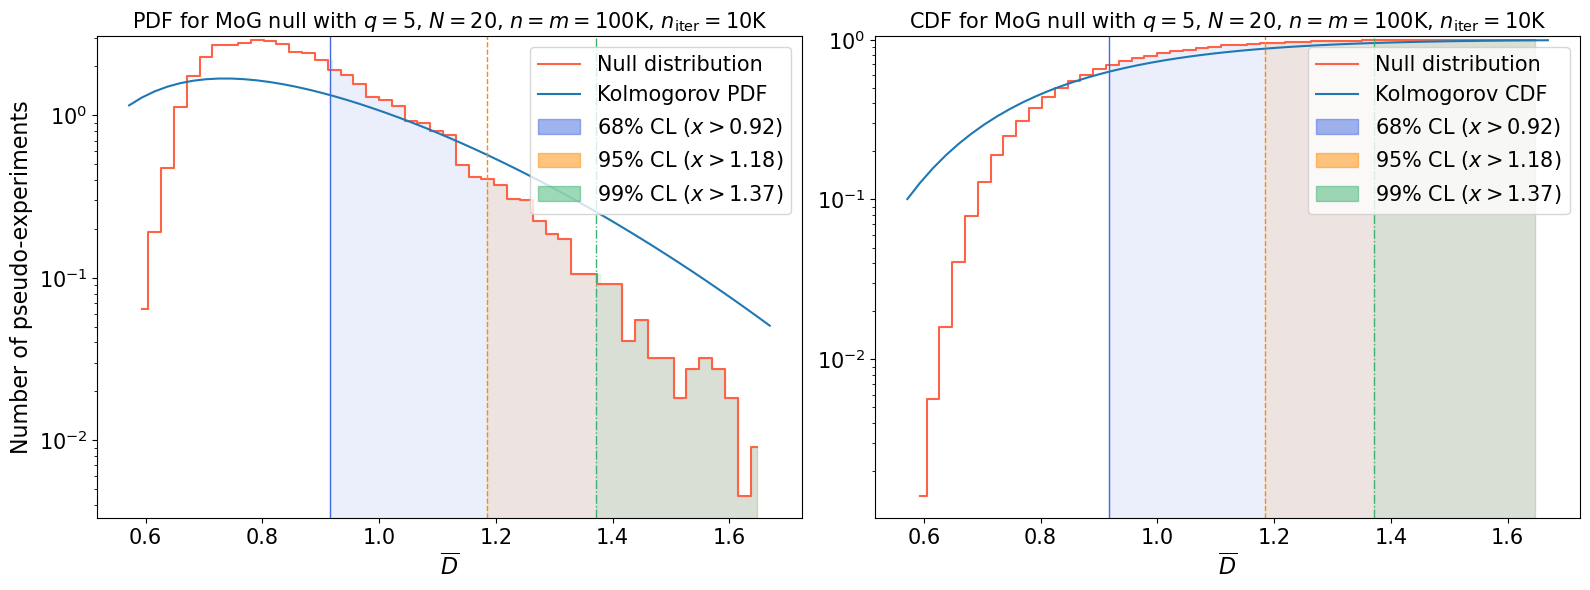

Time elapsed: 1.2212602198123932 seconds.
mu = 0.8702649456377327 +/- 0.00024136020197641154
sigma = 0.1553577168911836 +/- 0.001466338936518558


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


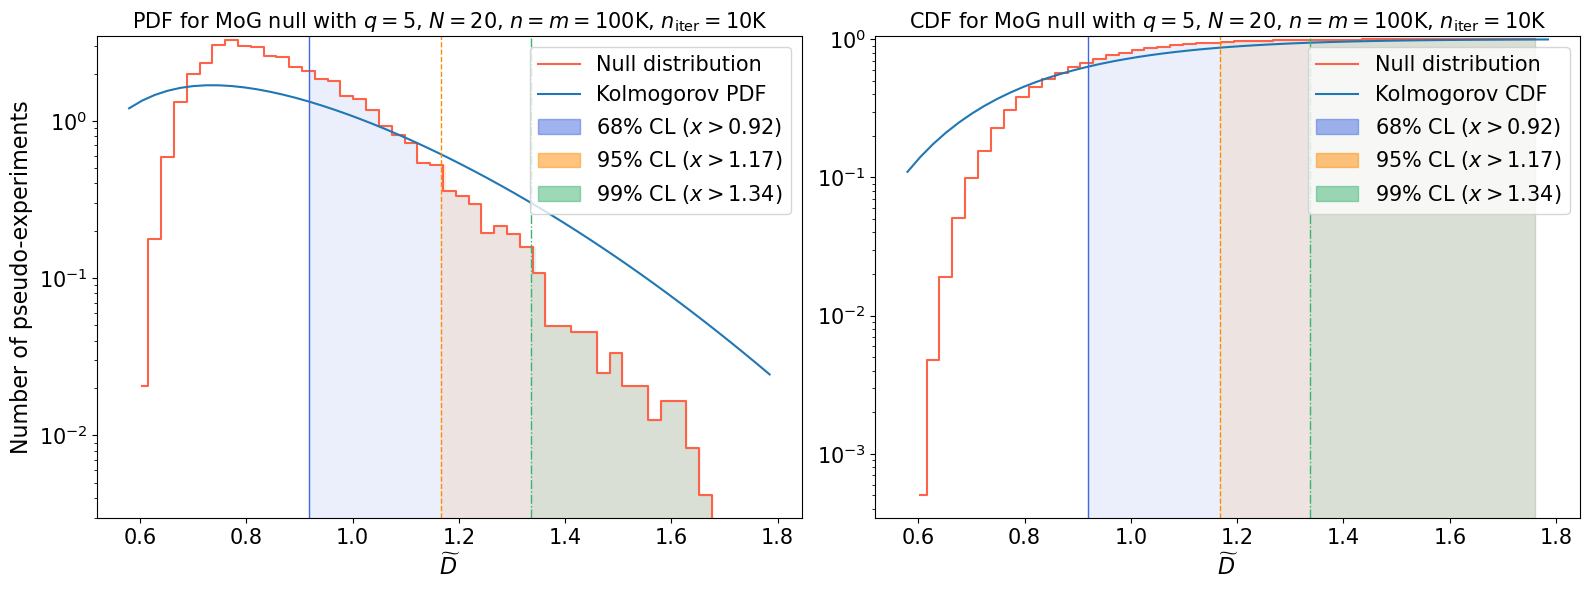

Time elapsed: 1.2739188112318516 seconds.
mu = 0.6348193151429157 +/- 0.000424070851077063
sigma = 0.2059298062634603 +/- 0.0018859599830024915


/tmp/ipykernel_41026/3251271146.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_41026/3251271146.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_41026/3251271146.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_41026/3251271146.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


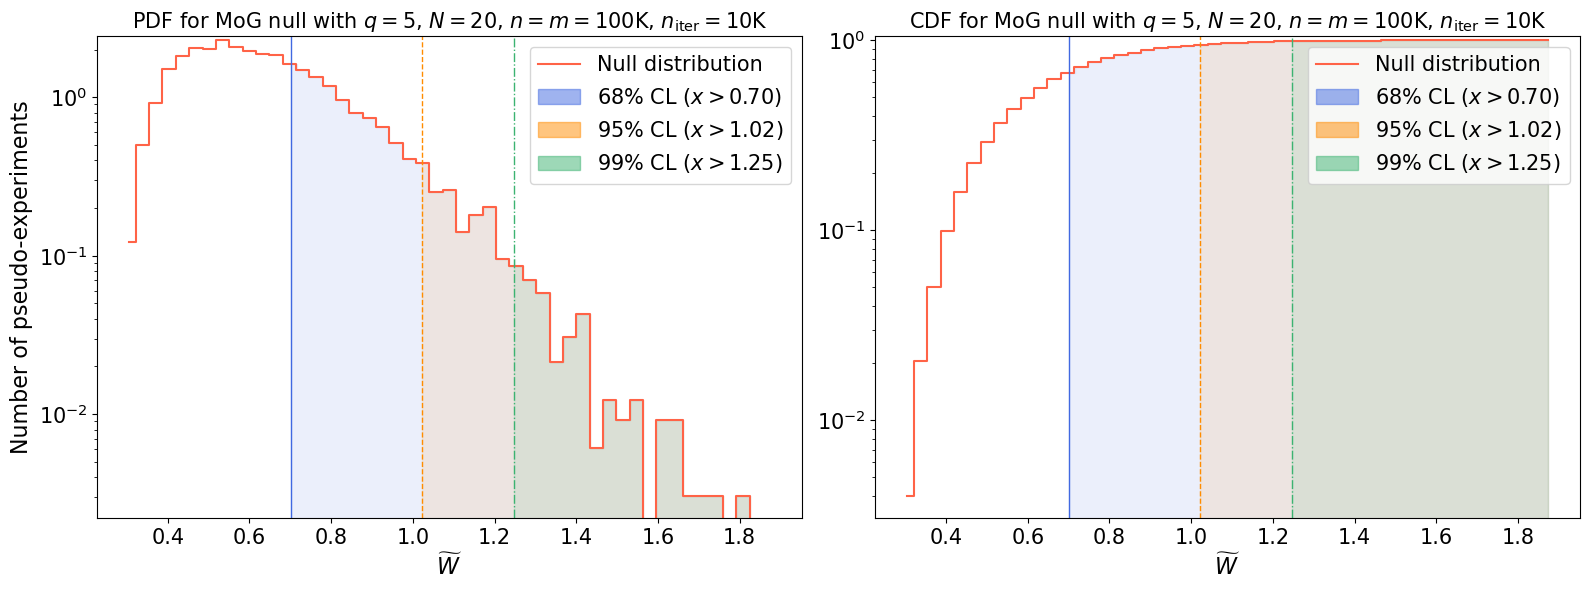

Time elapsed: 0.9008969515562057 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f3e4356b0a0>   
1          metric_list  <function <lambda> at 0x7f3e4356bf40>   
2          metric_list  <function <lambda> at 0x7f3e43401000>   
3      statistic_means  <function <lambda> at 0x7f3e43401090>   
4         metric_means  <function <lambda> at 0x7f3e43401120>   
5         metric_means  <function <lambda> at 0x7f3e434011b0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f3e43401240>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1  lambda ns, ndims: (ns/ndims)**(3/2)   
2  lambda ns, ndims: ns/np.sqrt(ndims)   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              2   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   

                        latex                                     null_file  \
0  $\overline{\|\cdot\|}_{F}$   ../results/20D_100K/null_hypothesis/FN.json   
1          $d_{\mathrm{FPD}}$  ../results/20D_100K/null_hypothesis/FPD.json   
2          $d_{\mathrm{KPD}}$  ../results/20D_100K/null_hypothesis/KPD.json   
3              $\overline{D}$   ../results/20D_100K/null_hypothesis/KS.json   
4             $\widetilde{D}$  ../results/20D_100K/null_hypothesis/SKS.json   
5             $\widetilde{W}$  ../results/20D_100K/null_hypothesis/SWD.json   
6                   $t_{\mu}$   ../results/20D_100K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6807187961337008], [0....   
1  [[0.68, [6800, 3199], 0.00015735387007512796],...   
2  [[0.68, [6800, 3199], -0.22887009460864668], [...   
3  [[0.68, [6800, 3199], 0.9164528634038741], [0....   
4  [[0.68, [6800, 3199], 0.9183098708262618], [0....   
5  [[0.68, [6800, 3199], 0.7012302162933935], [0....   
6                                                 []   

                                   null_figure  
0   ../results/20D_100K/null_hypothesis/FN.pdf  
1  ../results/20D_100K/null_hypothesis/FPD.pdf  
2  ../results/20D_100K/null_hypothesis/KPD.pdf  
3   ../results/20D_100K/null_hypothesis/KS.pdf  
4  ../results/20D_100K/null_hypothesis/SKS.pdf  
5  ../results/20D_100K/null_hypothesis/SWD.pdf  
6                                          NaN

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())


=============== fpd - only mean ===============

------------ 1 ------------
eps = 0.5


statistic = 1679.9386900132613 - next threshold = 37.92305847912669 at 0.95 CL

------------ 2 ------------
eps = 0.25
statistic = 438.52320124336353 - next threshold = 37.92305847912669 at 0.95 CL

------------ 3 ------------
eps = 0.125
statistic = 131.55411798692137 - next threshold = 37.92305847912669 at 0.95 CL

------------ 4 ------------
eps = 0.0625
statistic = 53.36715343034054 - next threshold = 37.92305847912669 at 0.95 CL

------------ 5 ------------
eps = 0.03125
statistic = 39.35049017911236 - next threshold = 37.92305847912669 at 0.95 CL

------------ 6 ------------
eps = 0.015625
statistic = 30.827703243023603 - next threshold = 37.92305847912669 at 0.95 CL

------------ 7 ------------
eps = 0.0234375
statistic = 34.04333597994621 - next threshold = 37.92305847912669 at 0.95 CL

------------ 8 ------------
eps = 0.02734375
statistic = 36.59950371305864 - next threshold = 37.92305847912669 at 0.95 CL

------------ 9 ------------
eps = 0.029296875
statistic = 37.294351989

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())


=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 200
Iterating from 0 to 50 out of 10000 .
Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10000 .
Iterating from 400 to 450 out of 10000 .
Iterating from 450 to 500 out of 10000 .
Iterating from 500 to 550 out of 10000 .
Iterating from 550 to 600 out of 10000 .
Iterating from 600 to 650 out of 10000 .
Iterating from 650 to 700 out of 10000 .
Iterating from 700 to 750 out of 10000 .
Iterating from 750 to 800 out of 10

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


NameError: name 'null_times' is not defined

In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean    5  10000                10000   
9         ks        mean    5  10000                10000   
12       sks        mean    5  10000                10000   
15       swd        mean    5  10000                10000   
3        fpd        mean    5  10000                10000   
0         fn        mean    5  10000                10000   
6        kpd        mean    5  10000                10000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00115                             0.00157   
9                              0.01010                             0.01342   
12                             0.02338                             0.03399   
15                             0.04333                             0.06272   
3                              0.06177                             0.08811   
0                              0.06372                             0.08635   
6                              0.07837                             0.10852   

    $t^{\mu}$ (s)  
18           1533  
9             227  
12            312  
15            231  
3             374  
0             225  
6             428

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00115   
9         ks                             0.01010   
12       sks                             0.02338   
15       swd                             0.04333   
3        fpd                             0.06177   
0         fn                             0.06372   
6        kpd                             0.07837   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00157           1533  
9                              0.01342            227  
12                             0.03399            312  
15                             0.06272            231  
3                              0.08811            374  
0                              0.08635            225  
6                              0.10852            428

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std    5  10000                10000   
10        ks         std    5  10000                10000   
13       sks         std    5  10000                10000   
16       swd         std    5  10000                10000   
4        fpd         std    5  10000                10000   
1         fn         std    5  10000                10000   
7        kpd         std    5  10000                10000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00140   
10                                0.02551   
13                                0.05542   
16                                0.09399   
4                                 0.13818   
1                                 0.17139   
7                                 0.99609   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00212              1453  
10                                0.03253               201  
13                                0.08056               281  
16                                0.13514               205  
4                                 0.19794               308  
1                                 0.25150               194  
7                                 0.99805               154

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00140   
10        ks                                0.02551   
13       sks                                0.05542   
16       swd                                0.09399   
4        fpd                                0.13818   
1         fn                                0.17139   
7        kpd                                0.99609   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00212              1453  
10                                0.03253               201  
13                                0.08056               281  
16                                0.13514               205  
4                                 0.19794               308  
1                                 0.25150               194  
7                                 0.99805               154

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both    5  10000                10000   
11        ks        both    5  10000                10000   
14       sks        both    5  10000                10000   
17       swd        both    5  10000                10000   
5        fpd        both    5  10000                10000   
2         fn        both    5  10000                10000   
8        kpd        both    5  10000                10000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00091   
11                                    0.00870   
14                                    0.02057   
17                                    0.03845   
5                                     0.05737   
2                                     0.05884   
8                                     0.07837   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00126                  1600  
11                                    0.01151                   237  
14                                    0.02954                   324  
17                                    0.05559                   210  
5                                     0.08200                   382  
2                                     0.07975                   202  
8                                     0.10852                   441

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00091   
11        ks                                    0.00870   
14       sks                                    0.02057   
17       swd                                    0.03845   
5        fpd                                    0.05737   
2         fn                                    0.05884   
8        kpd                                    0.07837   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00126                  1600  
11                                    0.01151                   237  
14                                    0.02954                   324  
17                                    0.05559                   210  
5                                     0.08200                   382  
2                                     0.07975                   202  
8                                     0.10852                   441

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $t_{\mathrm{LLR}}$                             0.00115   
1      $\overline{D}$                             0.01010   
2     $\widetilde{D}$                             0.02338   
3     $\widetilde{W}$                             0.04333   
4                 fpd                             0.06177   
5                  fn                             0.06372   
6                 kpd                             0.07837   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.00157           1533   
1                             0.01342            227   
2                             0.03399            312   
3                             0.06272            231   
4                             0.08811            374   
5                             0.08635            225   
6                             0.10852            428   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.00140   
1                                0.02551   
2                                0.05542   
3                                0.09399   
4                                0.13818   
5                                0.17139   
6                                0.99609   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.00212              1453   
1                                0.03253               201   
2                                0.08056               281   
3                                0.13514               205   
4                                0.19794               308   
5                                0.25150               194   
6                                0.99805               154   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.00091   
1                                    0.00870   
2                                    0.02057   
3                                    0.03845   
4                                    0.05737   
5                                    0.05884   
6                                    0.07837   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.00126                  1600   
1                                    0.01151                   237   
2                                    0.02954                   324   
3                                    0.05559                   210   
4                                    0.08200                   382   
5                                    0.07975                   202   
6                                    0.10852                   441   

  $t^{\mathrm{null}}$ (s)  
0                       -  
1                     335  
2                    1323  
3                     718  
4                    1305  
5                     250  
6                   17811

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0011 & 0.0016 & 1533 & 0.0014 & 0.0021 & 1453 & 0.00091 & 0.0013 & 1600 & - \\
$\overline{D}$ & 0.01 & 0.013 & 227 & 0.026 & 0.033 & 201 & 0.0087 & 0.012 & 237 & 335 \\
$\widetilde{D}$ & 0.023 & 0.034 & 312 & 0.055 & 0.081 & 281 & 0.021 & 0.03 & 324 & 1323 \\
$\widetilde{W}$ & 0.043 & 0.063 & 231 & 0.094 & 0.14 & 205 & 0.038 & 0.056 & 210 & 718 \\
fpd & 0.062 & 0.088 & 374 & 0.14 & 0.2 & 308 & 0.057 & 0.082 & 382 & 1305 \\
fn & 0.064 & 0.086 & 225 & 0.17 & 0.25 & 194 & 0.059 & 0.08 & 202 & 250 \\
kpd & 0.078 & 0.11 & 428 & 1 & 1 & 154 & 0.078 & 0.11 & 441 & 17811 \\
\bottomrule
\e

# Fixed $\epsilon$

In [11]:
fpd_results = {5: {10_000: [[0.68, 0.00010175550386551708], 
                            [0.95, 0.00015583746551772079], 
                            [0.99, 0.00022347410983350775]],
                   50_000: [[0.68, 4.5226688115357585e-05], 
                            [0.95, 5.398123973119404e-05], 
                            [0.99, 6.354077850007809e-05]],
                   100_000 : [[0.68, 3.725127064668703e-05], 
                              [0.95, 4.0825583153507725e-05], 
                              [0.99, 4.465564257168013e-05]]},
               20: {10_000: [[0.68, 0.0006669445748113884], 
                             [0.95, 0.0013217846893085318], 
                             [0.99, 0.0019605548728214763]],
                    100_000 : [[0.68, 0.00015735387007512796], 
                               [0.95, 0.0001991294338873111], 
                               [0.99, 0.00028358152805583374]]},
               100: {10_000: [[0.68, 0.0060367495598200515], 
                              [0.95, 0.009021833572706342], 
                              [0.99, 0.011125954730711617]],
                    100_000 : [[0.68, 0.000817842570244682], 
                               [0.95, 0.0011978135448655475], 
                               [0.99, 0.001414743609381014]]}}
fpd_results

{5: {10000: [[0.68, 0.00010175550386551708],
   [0.95, 0.00015583746551772079],
   [0.99, 0.00022347410983350775]],
  50000: [[0.68, 4.5226688115357585e-05],
   [0.95, 5.398123973119404e-05],
   [0.99, 6.354077850007809e-05]],
  100000: [[0.68, 3.725127064668703e-05],
   [0.95, 4.0825583153507725e-05],
   [0.99, 4.465564257168013e-05]]},
 20: {10000: [[0.68, 0.0006669445748113884],
   [0.95, 0.0013217846893085318],
   [0.99, 0.0019605548728214763]],
  100000: [[0.68, 0.00015735387007512796],
   [0.95, 0.0001991294338873111],
   [0.99, 0.00028358152805583374]]},
 100: {10000: [[0.68, 0.0060367495598200515],
   [0.95, 0.009021833572706342],
   [0.99, 0.011125954730711617]],
  100000: [[0.68, 0.000817842570244682],
   [0.95, 0.0011978135448655475],
   [0.99, 0.001414743609381014]]}}

In [24]:
def define_norm_df(dic,x,y):
    # Flatten the dictionary to a list of rows
    rows = []
    for N, n_dict in dic.items():
        for n, values in n_dict.items():
            row = {'N': N, 'n': n}
            for confidence, value in values:
                row[confidence] = value*(N**x)*(n**y)
            rows.append(row)

    # Convert the list of rows to a DataFrame
    df = pd.DataFrame(rows)

    # Optionally, rename the columns for clarity
    df.rename(columns={0.68: '0.68', 0.95: '0.95', 0.99: '0.99'}, inplace=True)
    return df

df = define_norm_df(fpd_results,-1/2,1/2)
# Show the DataFrame
display(df)

df = define_norm_df(fpd_results,-2/3,2/3)
# Show the DataFrame
display(df)

N       n      0.68      0.95      0.99
0    5   10000  0.004551  0.006969  0.009994
1    5   50000  0.004523  0.005398  0.006354
2    5  100000  0.005268  0.005774  0.006315
3   20   10000  0.014913  0.029556  0.043839
4   20  100000  0.011127  0.014081  0.020052
5  100   10000  0.060367  0.090218  0.111260
6  100  100000  0.025862  0.037878  0.044738

N       n      0.68      0.95      0.99
0    5   10000  0.016153  0.024738  0.035474
1    5   50000  0.020992  0.025056  0.029493
2    5  100000  0.027447  0.030081  0.032903
3   20   10000  0.042015  0.083267  0.123507
4   20  100000  0.046011  0.058226  0.082920
5  100   10000  0.130058  0.194370  0.239701
6  100  100000  0.081784  0.119781  0.141474